*Homework_5*

In [91]:
import numpy as np
import matplotlib.pyplot as plt

4.Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

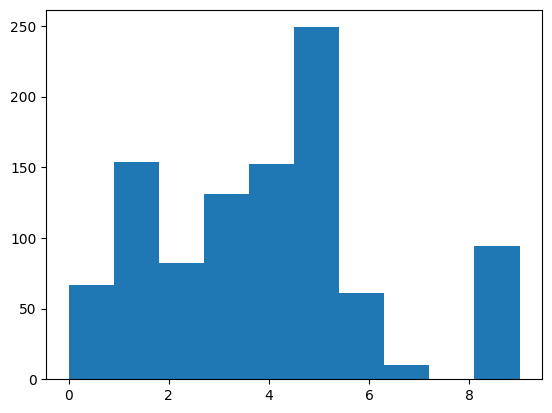

In [96]:
elements = np.arange(10)
weights = np.array([ 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()
y = np.random.choice(elements, 1000, p=weights)
plt.hist(y);


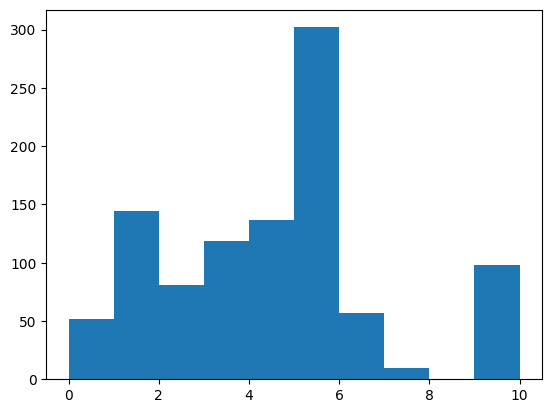

In [98]:
weights = np.array([ 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()
y = np.cumsum(weights)

sample = np.zeros(1000)

for i in range (1000):
    value = np.random.rand()
    j = 0
    while value >= y[j]:
        sample[i] += 1
        j += 1


plt.hist(sample, range = (0,10));
#print(sample)

5. Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

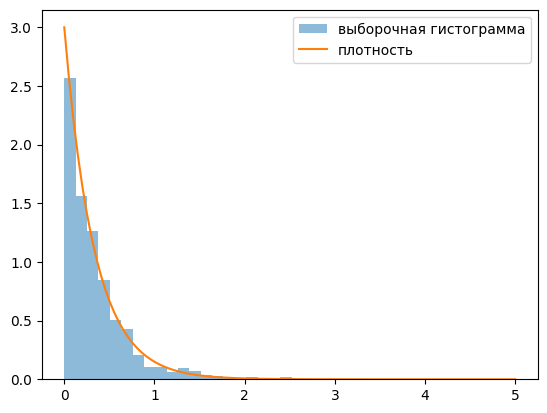

In [4]:
#np.random.seed(32)
par = 3
f = lambda x: -(np.log(1-x))/par
h = np.vectorize(f)
exp_sample = f(np.random.rand(1000))
plt.hist(exp_sample, bins=20, density=True, fill=True, alpha=0.5, label='выборочная гистограмма')
plt.plot(np.linspace(0, 5, 100), par * np.exp(-par * np.linspace(0, 5, 100)), label="плотность")
plt.legend()
plt.show()

6. Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

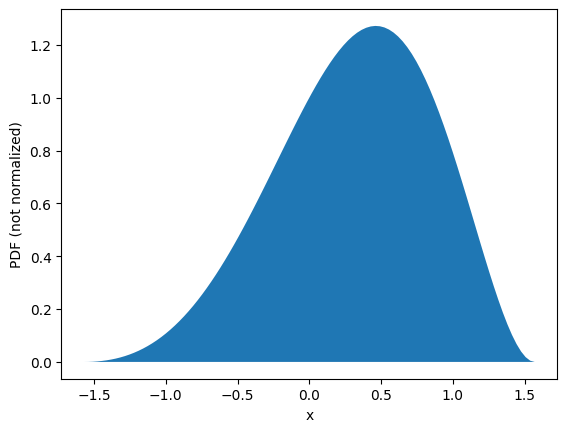

In [27]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

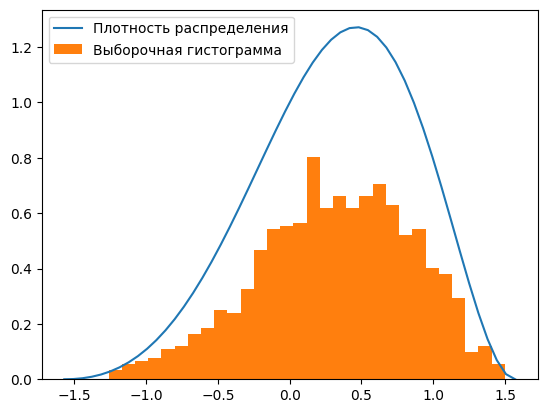

In [99]:
res = np.empty(1000)

i = 0
while i < 1000:
  x = np.random.normal(0.5, 1)
  y = np.random.uniform(0, 3.2 * ((2*np.pi)**(-1/2)) * np.exp(-(x-0.5)**2 / 2))
  if y <= np.exp(x) * (np.cos(x))**2 and -np.pi/2 <= x <= np.pi/2:
    res[i] = x
    i += 1

x = np.linspace(-np.pi/2, np.pi/2, 50)
plt.plot(x, np.exp(x) * (np.cos(x))**2, label = "Плотность распределения");
plt.hist(res, bins=30, density = 1, label = "Выборочная гистограмма");
plt.legend();


7. Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

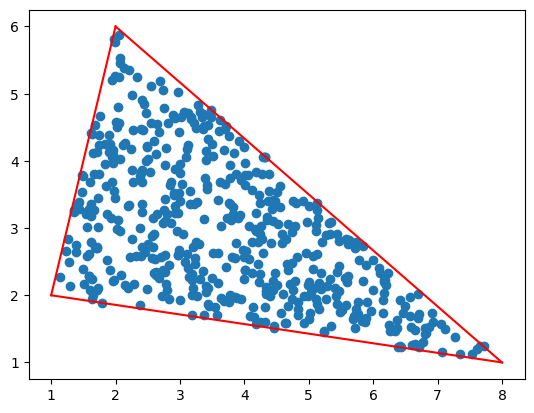

In [128]:
points = np.empty((500, 2))
for i in range (500):
    point = np.random.rand(2)
    x = point[0]
    y = point[1]
    if (x + y > 1):
        x, y = 1-x, 1-y
    points[i] = np.array([1, 2]) + x * np.array([7, -1]) + y * np.array([1, 4])
plt.scatter(points[:, 0], points[:, 1]);
plt.plot(np.linspace(1, 2, 50), 4 * np.linspace(1, 2, 50) -2, color='red');
plt.plot(np.linspace(1, 8, 50), -(1/7) * np.linspace(1, 8, 50) + 15/7, color='red');
plt.plot(np.linspace(2, 8, 50), -(5/6) * np.linspace(2, 8, 50) + 46/6, color='red');



8. Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?



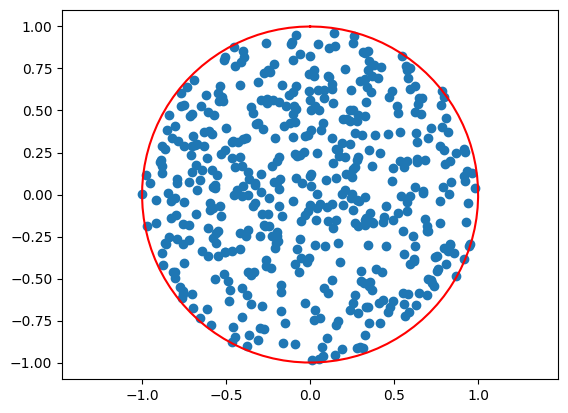

In [86]:
t = np.array([np.random.uniform(0, 2 * np.pi) for _ in range(500)])
rad = np.random.rand(500)
x = np.sqrt(rad) * np.cos(t)
y = np.sqrt(rad) * np.sin(t)
plt.scatter(x, y)
plt.axis('equal')
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color='red')

9. Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

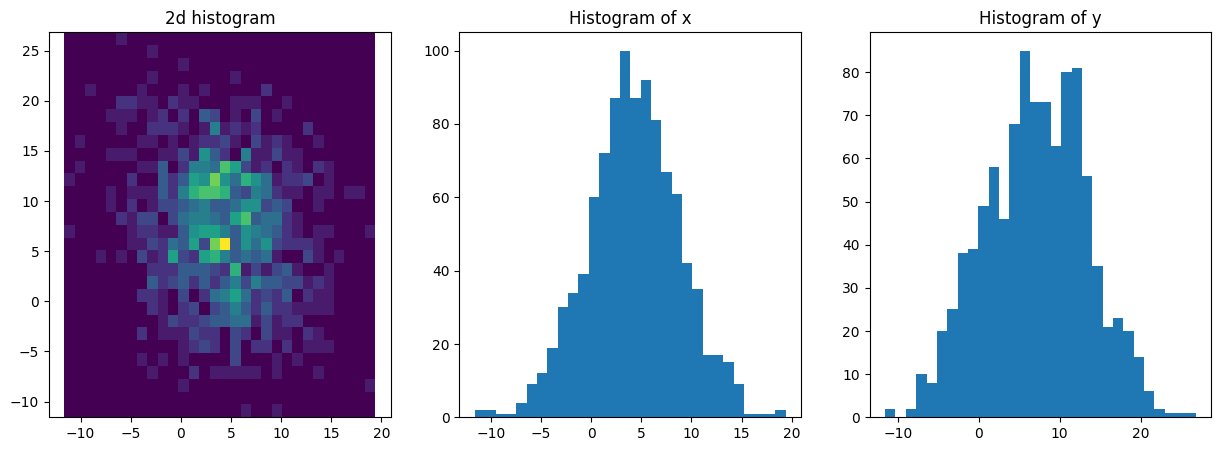

4.243104943958339 7.0759307400225495
[[20.94165972 -5.02076127]
 [-5.02076127 39.44614209]]


In [153]:
x_samp = np.empty(1000)
y_samp = np.empty(1000)
i = 0
while i < 1000:
  x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
  if 0 < x**2 + y**2 <= 1:
    x_samp[i] = x * np.sqrt(-2 * np.log(x**2 + y**2) / (x**2 + y**2))
    y_samp[i] = y * np.sqrt(-2 * np.log(x**2 + y**2) / (x**2 + y**2))
    i += 1
res = np.array([x_samp, y_samp])
matr_transform = np.array([-2, 4, 6, 2]).reshape((2, 2))
res = np.array([4, 7]).reshape(2, 1) + matr_transform @ res

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(res[0], res[1], bins=30)
ax[0].axis('equal')
ax[1].hist(res[0], bins=30)
ax[2].hist(res[1], bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()
print(res[0].mean(), res[1].mean())
print(np.cov(res[0], res[1]))
